# Análisis Resultados
## Pose Buster Benchmark set

In [11]:
# cargar fichero resultados
import pandas as pd
import numpy as np

def load_result(path_file:str):
    df= pd.read_csv(path_file, header=None, usecols=[0] + list(np.arange(3, 30)),  index_col=0)
    df.columns=[
    "mol_pred_loaded",
    "mol_true_loaded",
    "mol_cond_loaded",
    "sanitization",
    "inchi_convertible",
    "all_atoms_connected",
    "molecular_formula",
    "molecular_bonds",
    "double_bond_stereochemistry",
    "tetrahedral_chirality",
    "bond_lengths",
    "bond_angles",
    "internal_steric_clash",
    "aromatic_ring_flatness",
    "non_aromatic_ring_non_flatness",
    "double_bond_flatness",
    "internal_energy",
    "protein_ligand_maximum_distance",
    "minimum_distance_to_protein",
    "minimum_distance_to_organic_cofactors",
    "minimum_distance_to_inorganic_cofactors",
    "minimum_distance_to_waters",
    "volume_overlap_with_protein",
    "volume_overlap_with_organic_cofactors",
    "volume_overlap_with_inorganic_cofactors",
    "volume_overlap_with_waters",
    "rmsd_leq_2A"
]
    return df


In [12]:
# número de test que pasa cada complejo proteina-ligando
def test_per_complex(df):
    return df.sum(axis=1)


In [13]:
# complejos que pasan todos los test
def all_test(df):
    return df.all(axis=1)

In [14]:
# Visualizaciones

import matplotlib.pyplot as plt

def plot_test_test_per_complex(data, title):

    normalized_data =test_per_complex(data)/27
    colors = ['red' if val >= 1 else 'blue' for val in normalized_data]

    ax = normalized_data.plot(kind="bar", figsize=(20, 5), color=colors)
    plt.xlabel("Test")
    plt.ylabel("Número de complejos que pasan el test")
    plt.title(title)
    plt.show()


import seaborn as sns

def plot_heat_map(data):
    plt.figure(figsize=(20, 18))
    sns.heatmap(data.astype(int), cmap="coolwarm", cbar=True)
    plt.xlabel("Tests")
    plt.ylabel("Complejos proteína-ligando")
    plt.show()


In [17]:
# filtra

def filtrar(df):
    with open("pb.txt", "r") as f:
        protein = [x.strip() for x in f.read().split(",")]


    protein=[x.replace(' ', '_') for x in protein]
    return df.loc[df.index.intersection(protein)]

## Resultados DiffDock

In [18]:
diffdock_astex=filtrar(load_result("results/results_posebusters_diffdock/evaluation.csv"))

In [19]:
test_per_complex(diffdock_astex)

0
5SAK_ZRY    23
5SB2_1K2    27
5SD5_HWI    18
5SIS_JSM    23
6M2B_EZO    24
            ..
8G6P_API    26
8GFD_ZHR    25
8HFN_XGC    24
8HO0_3ZI    26
8SLG_G5A    18
Length: 301, dtype: int64

In [20]:
all_test(diffdock_astex)

0
5SAK_ZRY    False
5SB2_1K2     True
5SD5_HWI    False
5SIS_JSM    False
6M2B_EZO    False
            ...  
8G6P_API    False
8GFD_ZHR    False
8HFN_XGC    False
8HO0_3ZI    False
8SLG_G5A    False
Length: 301, dtype: bool

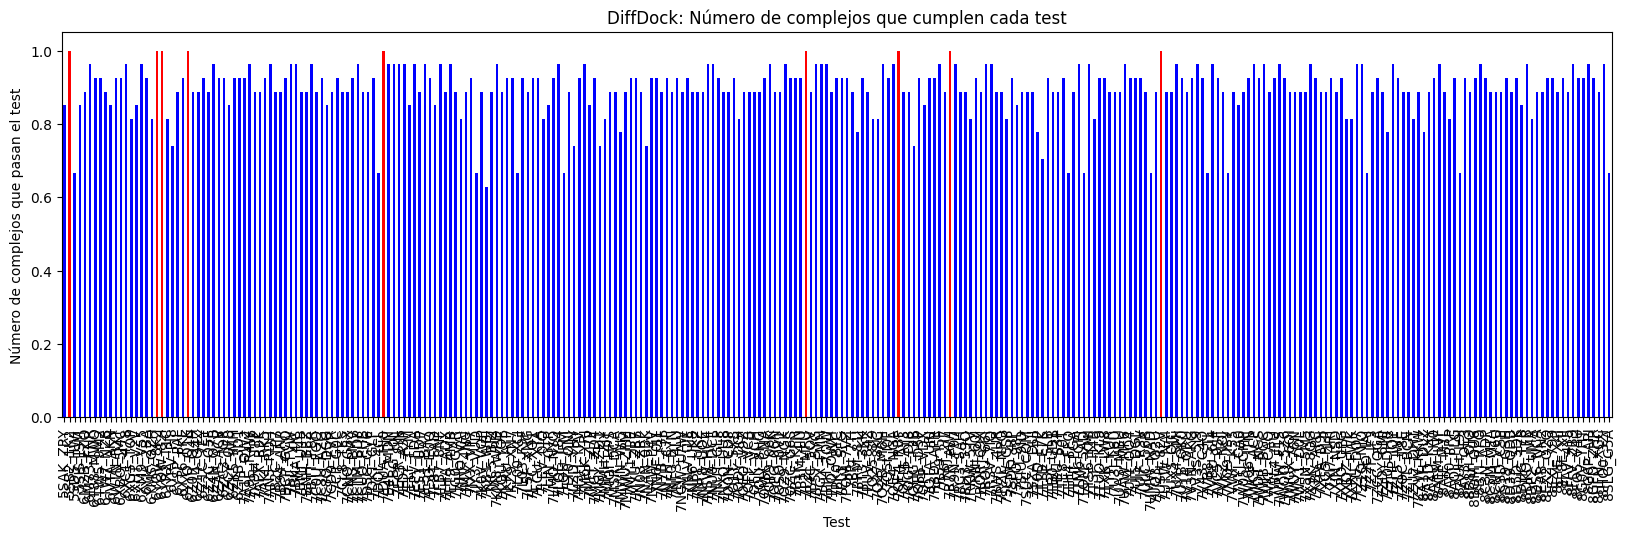

In [21]:
plot_test_test_per_complex(diffdock_astex, "DiffDock: Número de complejos que cumplen cada test")

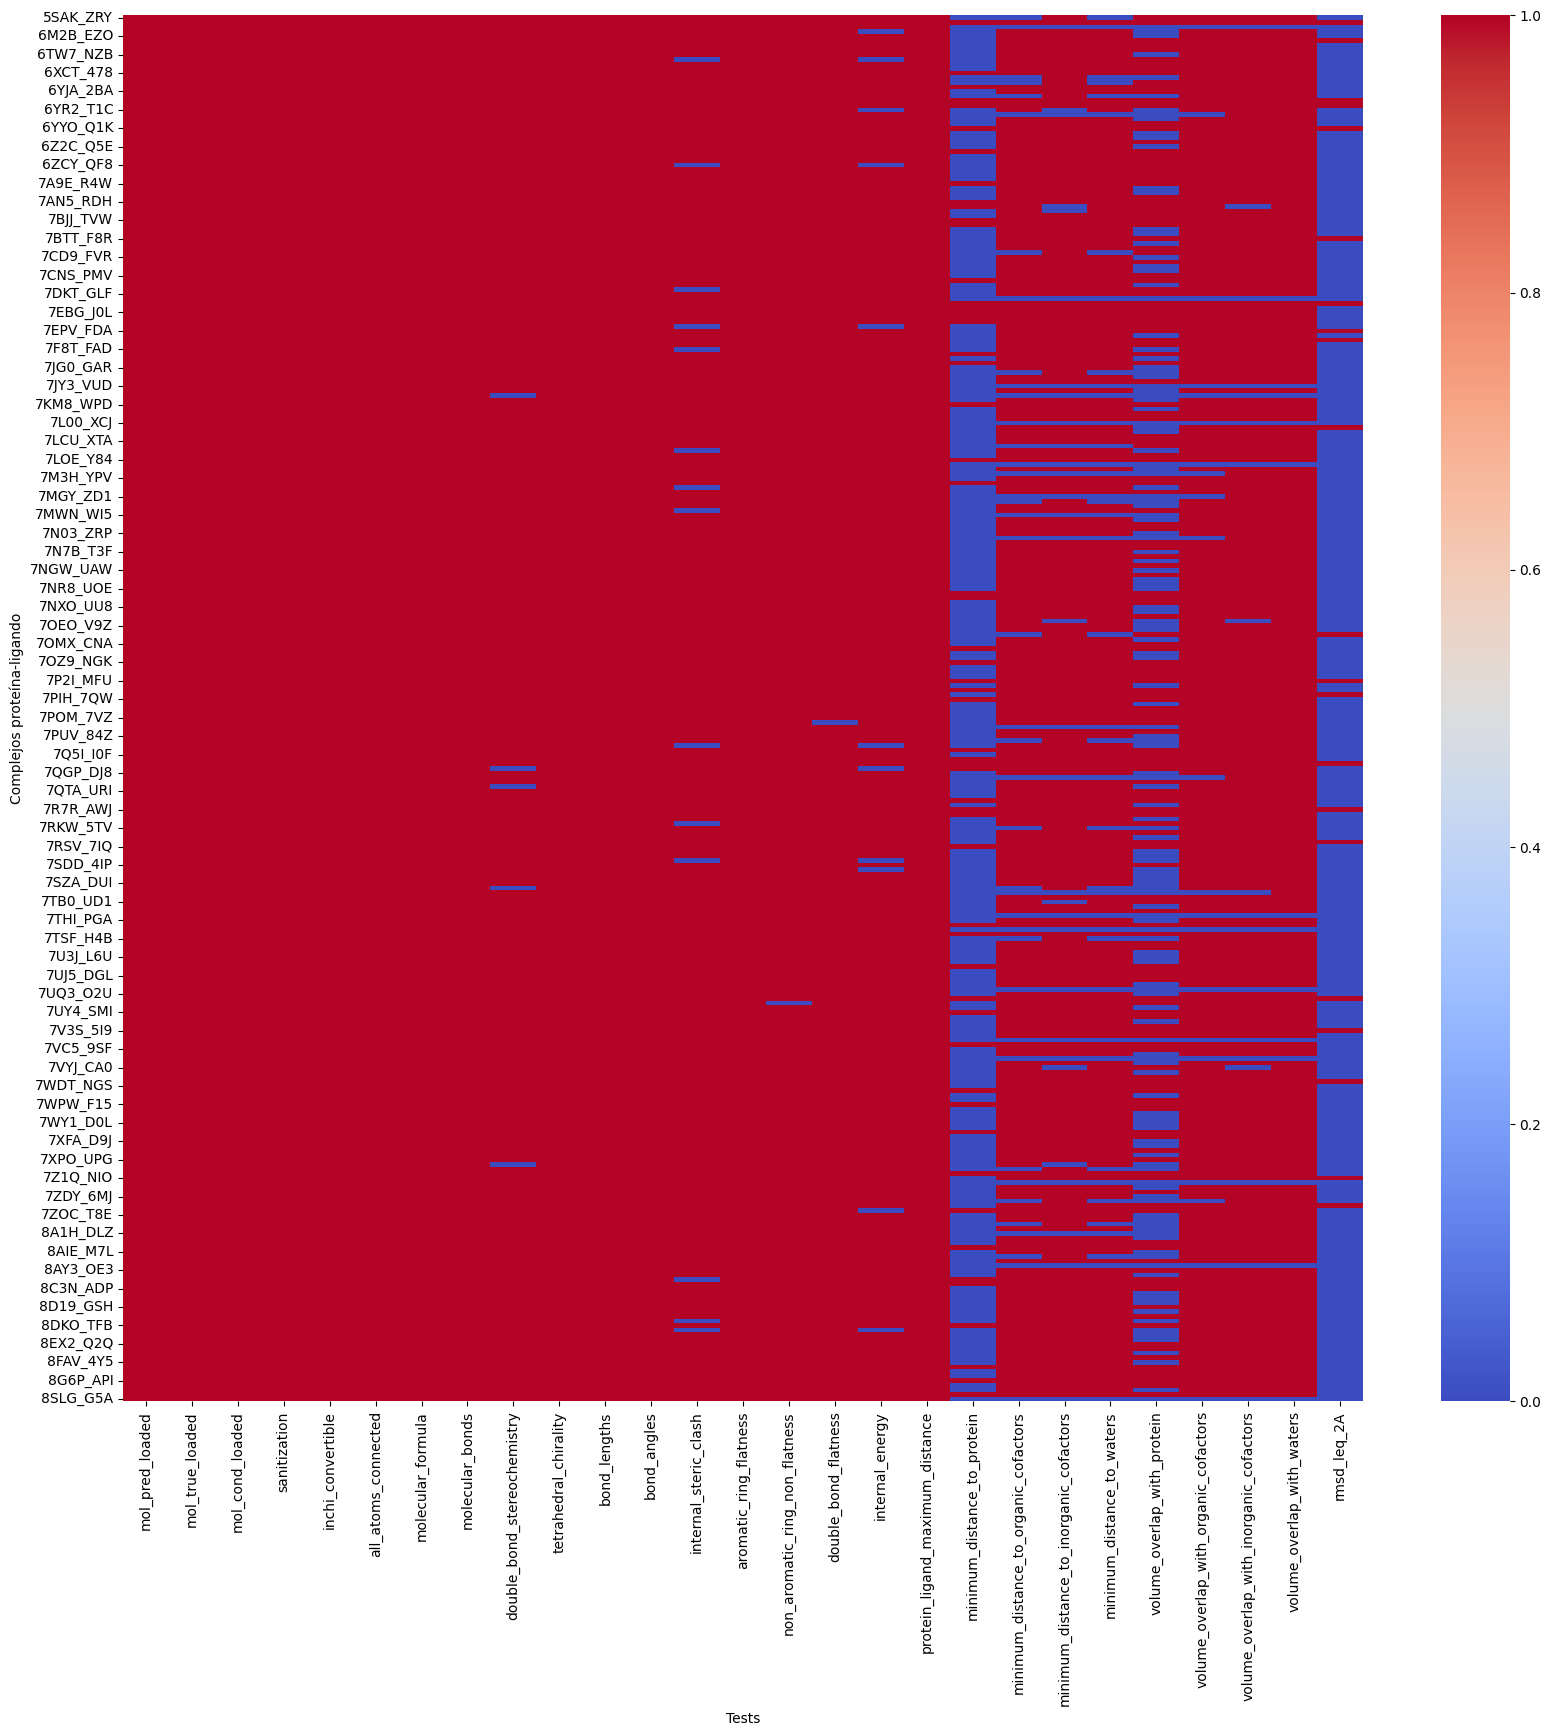

In [22]:
plot_heat_map(diffdock_astex)

## Resultados EquiBind

In [23]:
equibind_astex = filtrar(load_result("/home/carmen/docking/results/results_posebusters_benchmark_set/resultsBust.csv"))
equibind_astex

,mol_pred_loaded,mol_true_loaded,mol_cond_loaded,sanitization,inchi_convertible,all_atoms_connected,molecular_formula,molecular_bonds,double_bond_stereochemistry,tetrahedral_chirality,...,protein_ligand_maximum_distance,minimum_distance_to_protein,minimum_distance_to_organic_cofactors,minimum_distance_to_inorganic_cofactors,minimum_distance_to_waters,volume_overlap_with_protein,volume_overlap_with_organic_cofactors,volume_overlap_with_inorganic_cofactors,volume_overlap_with_waters,rmsd_leq_2A
0,,,,,,,,,,,,,,,,,,,,,
5SAK_ZRY,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,False,True,True,True,False
5SB2_1K2,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,False,True,True,True,False
5SD5_HWI,True,True,True,True,True,True,True,True,True,True,...,True,False,False,False,False,False,False,False,False,False
5SIS_JSM,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,False,True,True,True,False
6M2B_EZO,True,True,True,True,True,True,True,True,True,True,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8G6P_API,True,True,True,True,True,True,True,True,True,True,...,True,False,False,True,False,False,True,True,True,False
8GFD_ZHR,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,False,True,True,True,False
8HFN_XGC,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,False,True,True,True,False


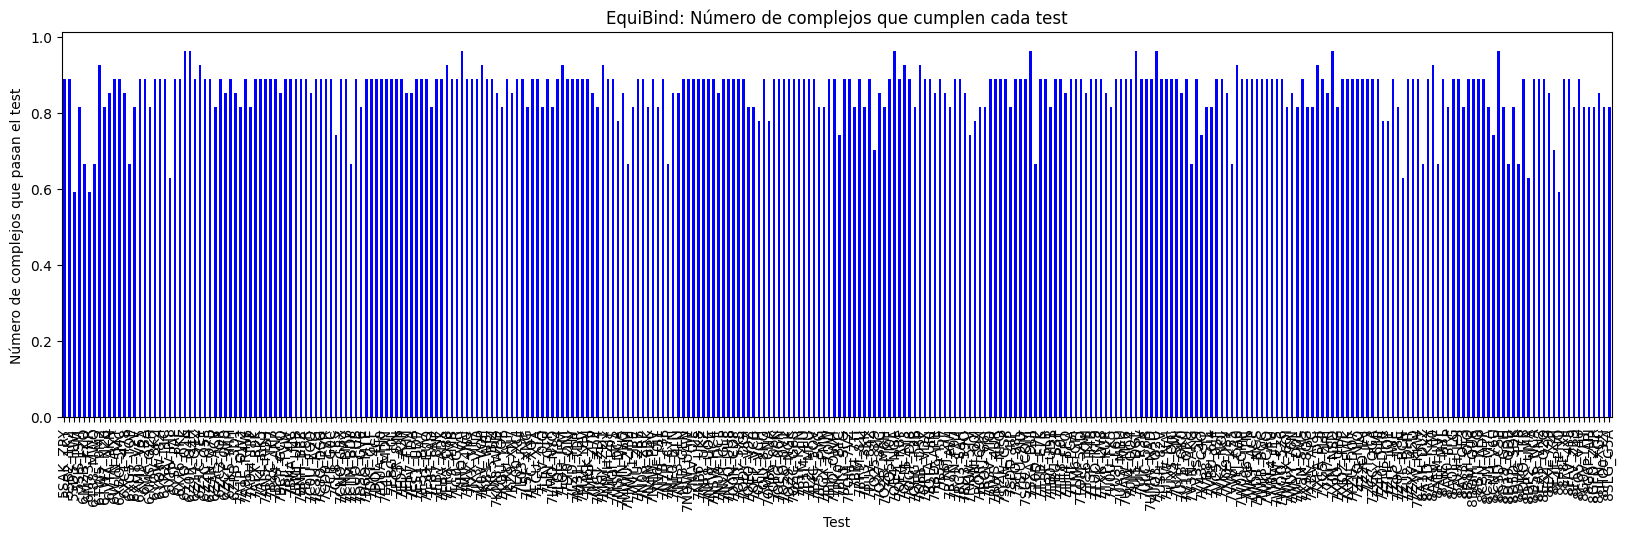

In [24]:
plot_test_test_per_complex(equibind_astex, "EquiBind: Número de complejos que cumplen cada test")

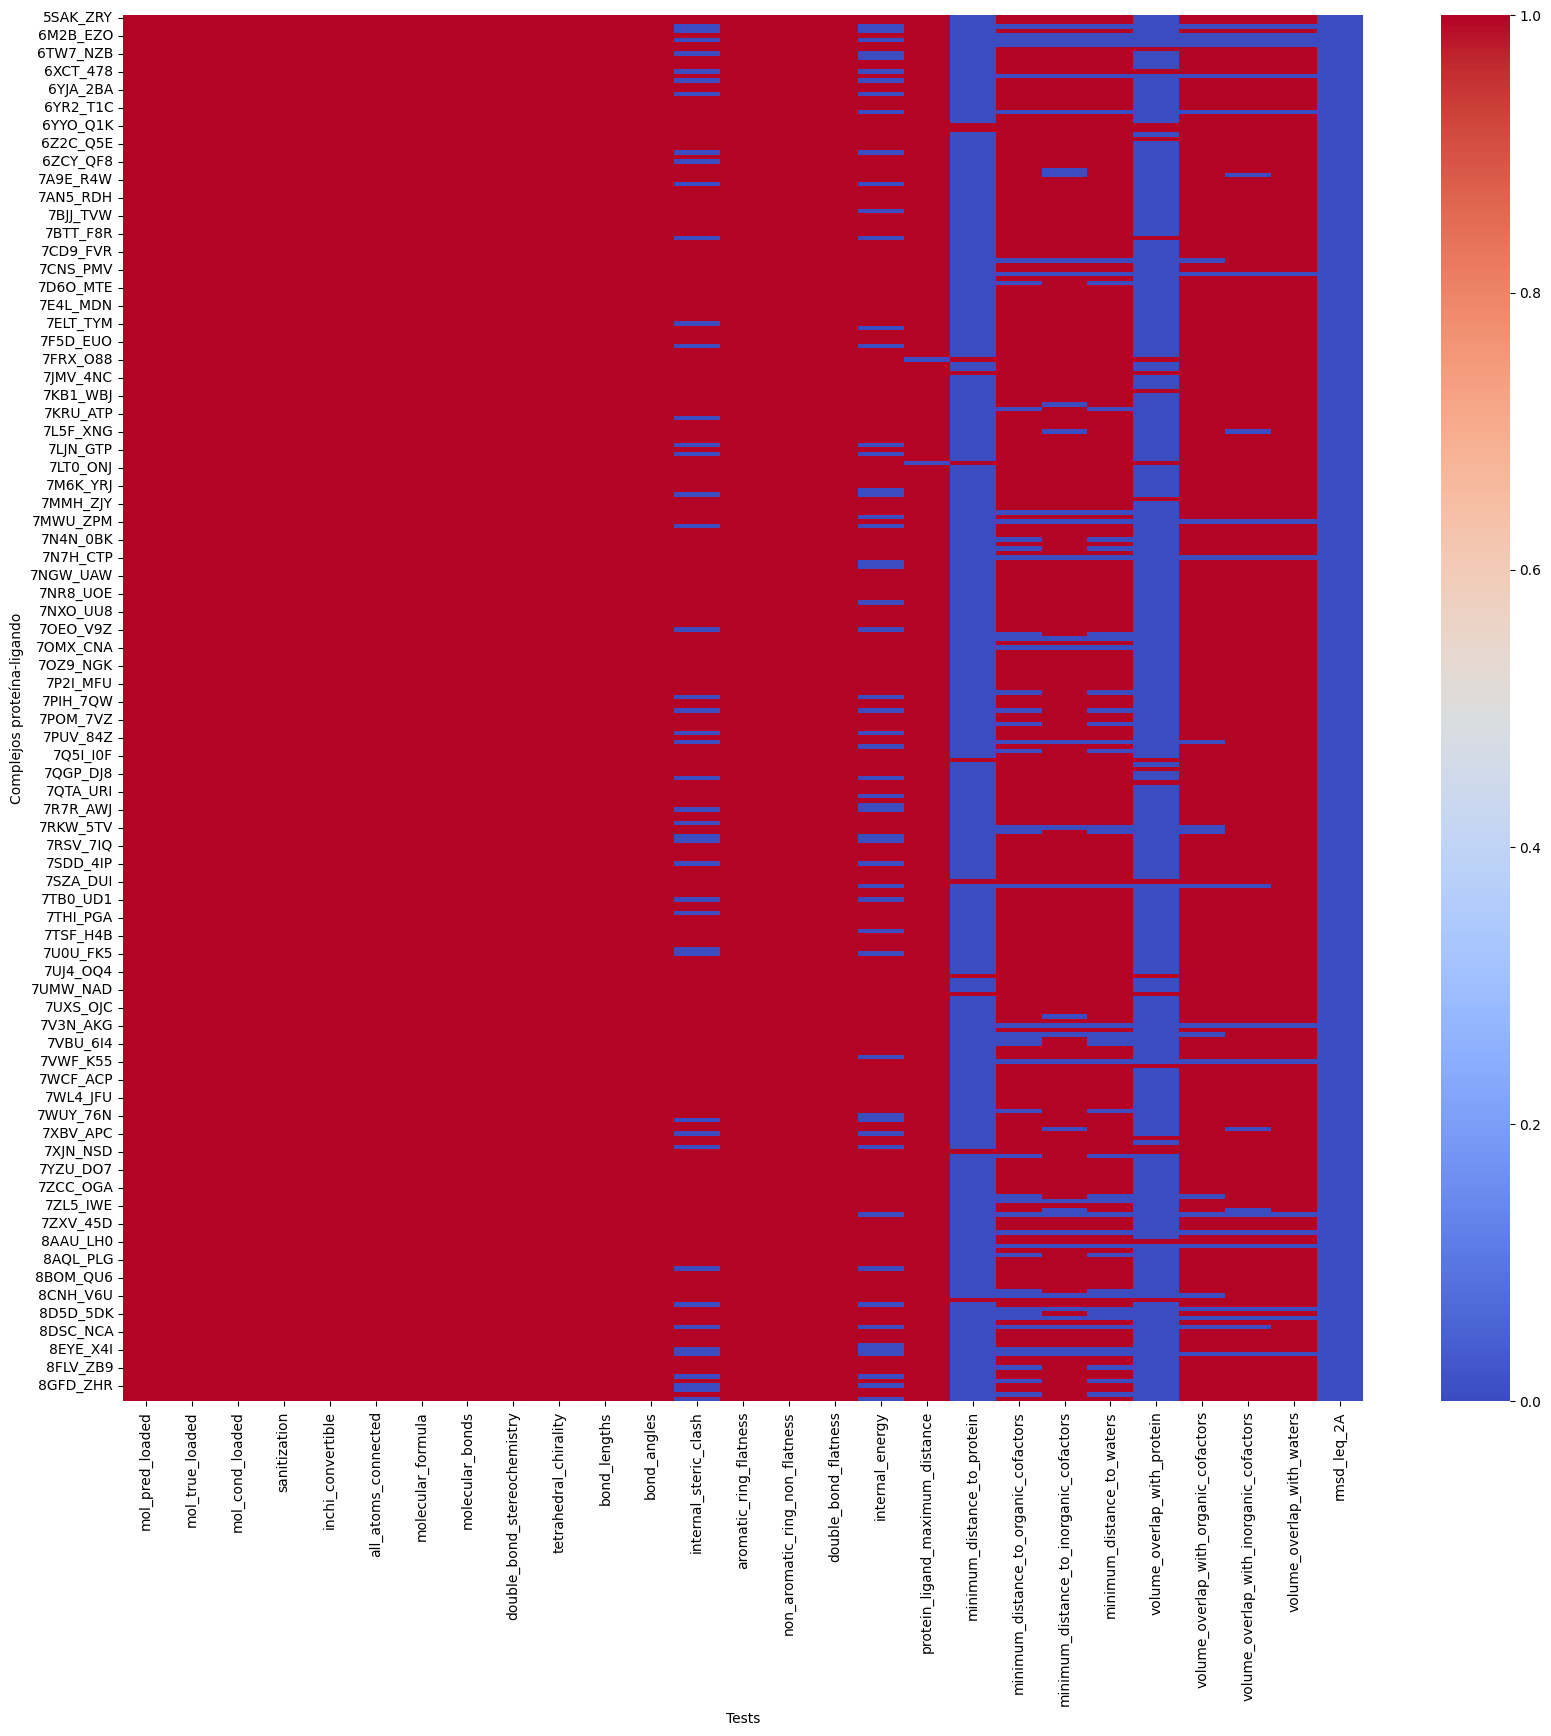

In [25]:
plot_heat_map(equibind_astex)

## Resultados DeepDock

Para algunos sdf no se ha podido realizar el test de posebuster porque salia un error de unkekulized atoms. No se si debería tomarse directamente como que el test ha fallado.

In [36]:
deepdock_astex = filtrar(load_result("/home/carmen/docking/results/resultsBustPBDeepDock.csv"))
deepdock_astex

,mol_pred_loaded,mol_true_loaded,mol_cond_loaded,sanitization,inchi_convertible,all_atoms_connected,molecular_formula,molecular_bonds,double_bond_stereochemistry,tetrahedral_chirality,...,protein_ligand_maximum_distance,minimum_distance_to_protein,minimum_distance_to_organic_cofactors,minimum_distance_to_inorganic_cofactors,minimum_distance_to_waters,volume_overlap_with_protein,volume_overlap_with_organic_cofactors,volume_overlap_with_inorganic_cofactors,volume_overlap_with_waters,rmsd_leq_2A
0,,,,,,,,,,,,,,,,,,,,,
5SAK_ZRY,True,True,True,True,True,True,True,True,True,True,...,True,False,False,True,False,True,True,True,True,False
5SD5_HWI,True,True,True,True,True,True,True,True,True,True,...,True,False,False,False,False,False,False,True,True,False
6M2B_EZO,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,True,True,True,True,True
6VTA_AKN,True,True,True,True,True,True,True,True,True,False,...,True,False,True,True,True,False,True,True,True,False
6XCT_478,True,True,True,True,True,True,True,True,True,False,...,True,False,True,True,True,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8EAB_VN2,True,True,True,True,True,True,True,True,True,False,...,True,False,True,True,True,True,True,True,True,False
8EYE_X4I,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,False,True,True,True,False
8G6P_API,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,True,True,True,True,False


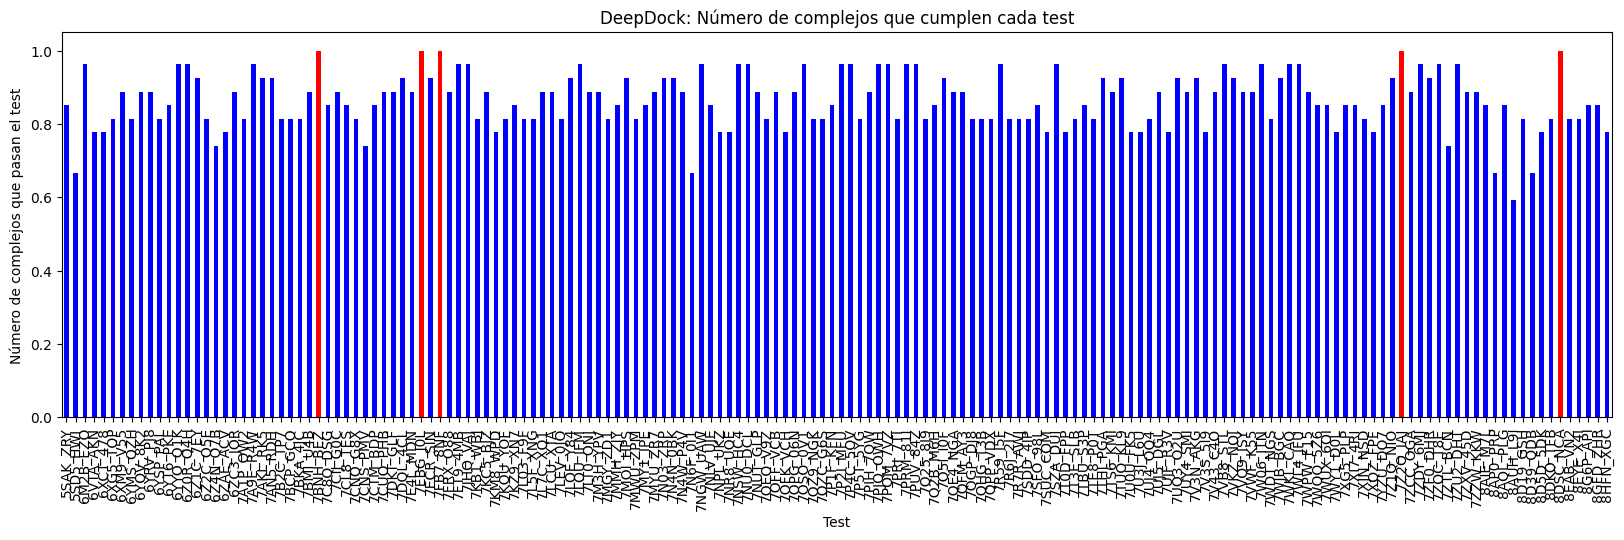

In [37]:
plot_test_test_per_complex(deepdock_astex, "DeepDock: Número de complejos que cumplen cada test")

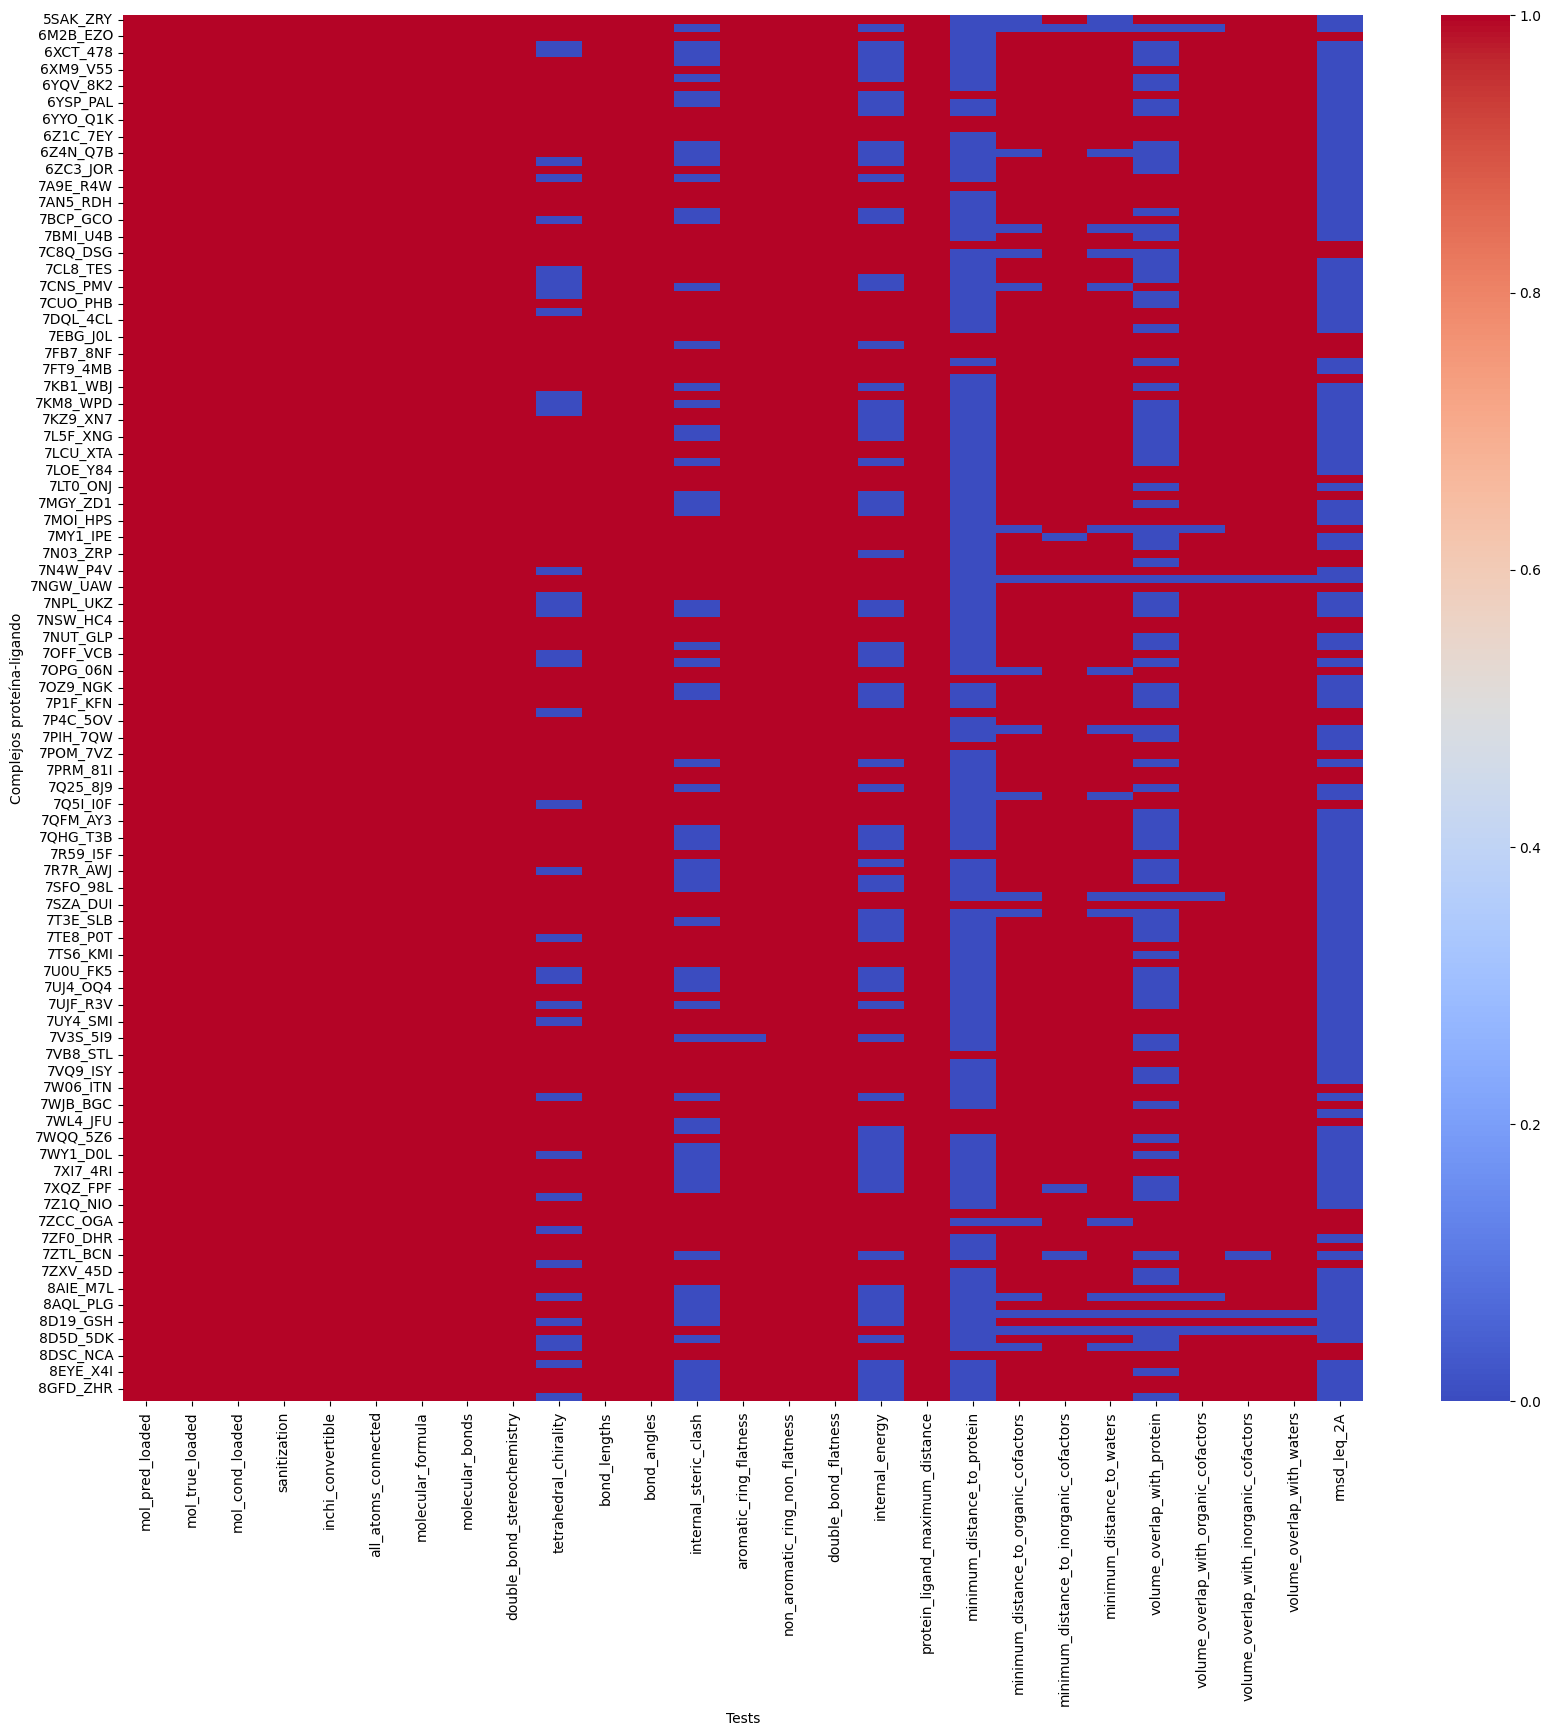

In [38]:
plot_heat_map(deepdock_astex)

## Resultados UniMol

In [26]:
unimol_astex = filtrar(load_result("results/results_posebusters_unimol/resultsBustUniMol.csv"))
unimol_astex

,mol_pred_loaded,mol_true_loaded,mol_cond_loaded,sanitization,inchi_convertible,all_atoms_connected,molecular_formula,molecular_bonds,double_bond_stereochemistry,tetrahedral_chirality,...,protein_ligand_maximum_distance,minimum_distance_to_protein,minimum_distance_to_organic_cofactors,minimum_distance_to_inorganic_cofactors,minimum_distance_to_waters,volume_overlap_with_protein,volume_overlap_with_organic_cofactors,volume_overlap_with_inorganic_cofactors,volume_overlap_with_waters,rmsd_leq_2A
0,,,,,,,,,,,,,,,,,,,,,
5SAK_ZRY,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5SD5_HWI,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5SIS_JSM,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6M2B_EZO,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6VTA_AKN,True,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8G0V_YHT,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8G6P_API,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8GFD_ZHR,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


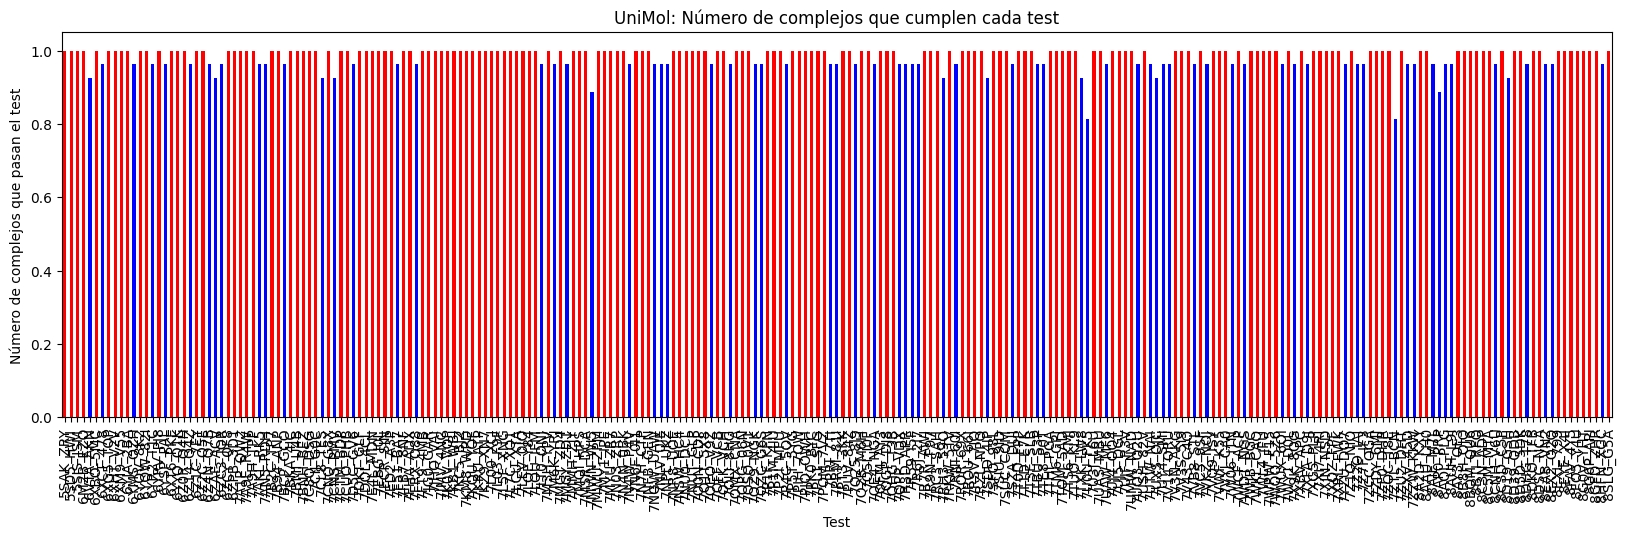

In [27]:
plot_test_test_per_complex(unimol_astex, "UniMol: Número de complejos que cumplen cada test")

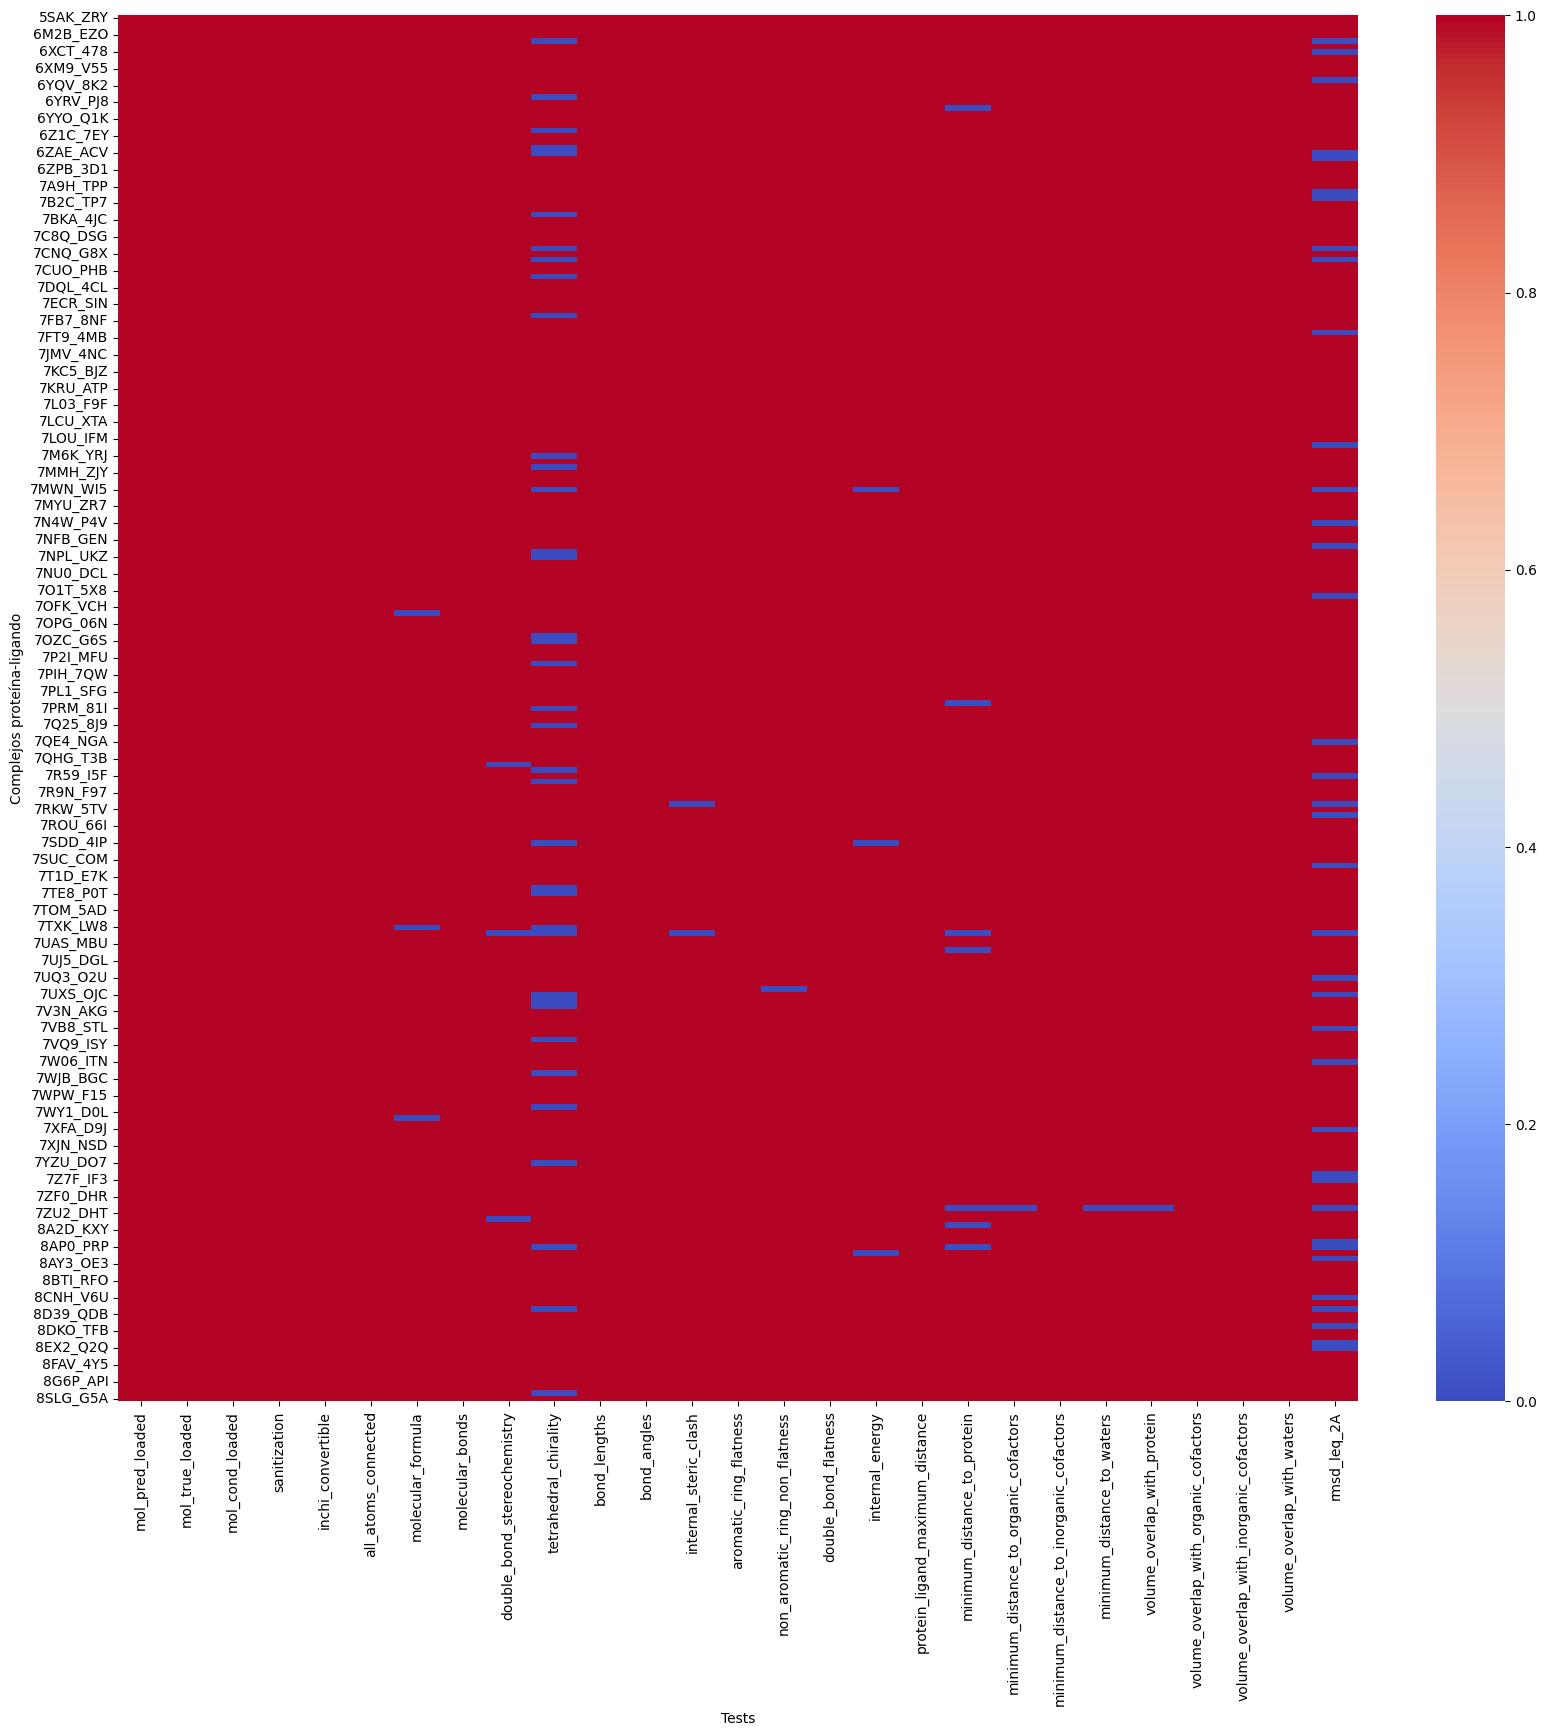

In [28]:
plot_heat_map(unimol_astex)

# Comparar los distintos resultados

/home/carmen/miniconda3/lib/python3.12/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/carmen/miniconda3/lib/python3.12/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

<Figure size 1200x600 with 0 Axes>

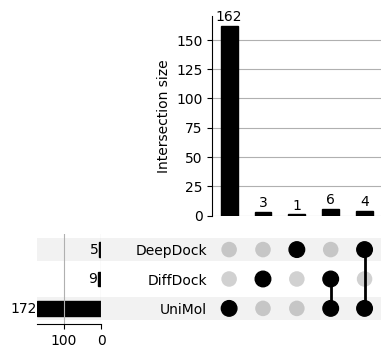

In [39]:
#Diagramas de Venn
import pandas as pd
from upsetplot import UpSet
import matplotlib.pyplot as plt

def true_rows(df):
    """Devuelve los índices de las filas donde todos los valores son True."""
    return set(df.index[df.all(axis=1)])

# Supongamos que tienes estos DataFrames
# df1, df2, df3, df4

# Crear diccionario de sets
sets = {
    "DiffDock": true_rows(diffdock_astex),
    "DeepDock": true_rows(deepdock_astex),
    "EquiBind": true_rows(equibind_astex),
    "Unimol": true_rows(unimol_astex)
}

# Crear una tabla binaria (True si el índice está en el set)
all_indices = set.union(*sets.values())
binary_data = {
    idx: [idx in sets["DiffDock"], idx in sets["DeepDock"], idx in sets["EquiBind"], idx in sets["Unimol"]]
    for idx in all_indices
}

# Convertir a DataFrame
binary_df = pd.DataFrame.from_dict(binary_data, orient="index", columns=["DiffDock", "DeepDock", "EquiBind", "UniMol"])

# Contar ocurrencias
from upsetplot import from_indicators
upset_data = from_indicators(binary_df.columns, binary_df)

# Graficar
plt.figure(figsize=(12, 6))
UpSet(upset_data, show_counts=True).plot()
#plt.title("UpSet plot - Complejos que pasan todos los tests")
plt.show()


<Figure size 1000x1000 with 0 Axes>

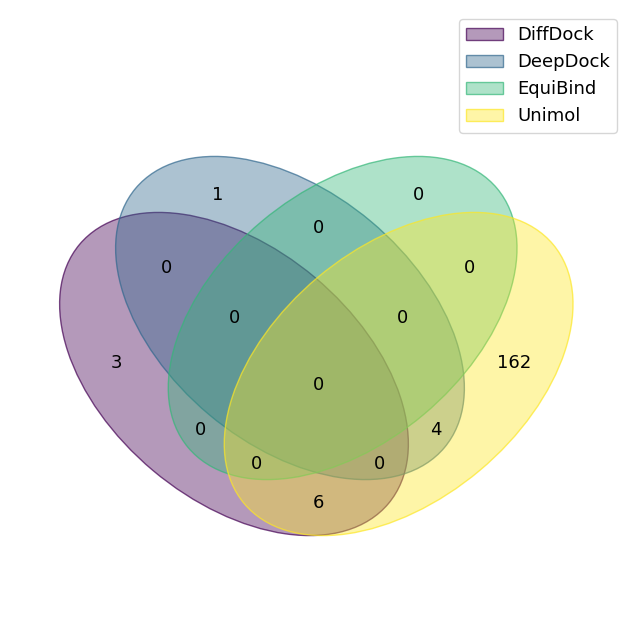

In [40]:
import matplotlib.pyplot as plt
from venn import venn

def true_rows(df):
    """Devuelve los índices de las filas donde todos los valores son True."""
    return set(df.index[df.all(axis=1)])

# Tus DataFrames
# df1, df2, df3, df4

# Crear los sets
sets = {
    "DiffDock": true_rows(diffdock_astex),
    "DeepDock": true_rows(deepdock_astex),
    "EquiBind": true_rows(equibind_astex),
    "Unimol": true_rows(unimol_astex)
}
# Graficar Venn
plt.figure(figsize=(10, 10))
venn(sets)
#plt.title("Venn 4 conjuntos - Complejos que pasan todos los tests")
plt.show()


Chequear por que no cuadra mucho

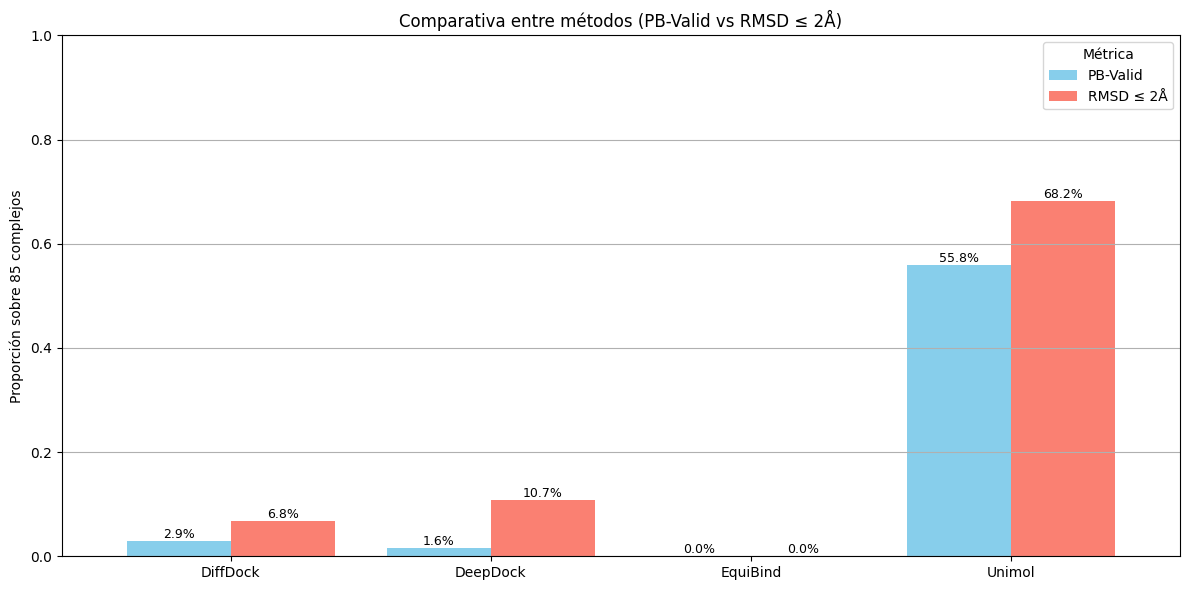

In [41]:
# Diagrama de Barra con el porcentaje de aciertos 

## !! Supongo que lo que ha fallado en deepdock y unimol es que no son pb valid

#diffdock_astex.all(axis=1).sum()/85 # porcentaje que pasa todos los test
#diffdock_results['rmsd_leq_2A'].sum()/82

import matplotlib.pyplot as plt
import pandas as pd


sets = {
    "DiffDock": diffdock_astex,
    "DeepDock": deepdock_astex,
    "EquiBind": equibind_astex,
    "Unimol": unimol_astex
}


proporciones_pass_all = {}
proporciones_rmsd = {}

for nombre, df in sets.items():
    proporciones_pass_all[nombre] = df.all(axis=1).sum() / 308
    proporciones_rmsd[nombre] = df['rmsd_leq_2A'].sum() / 308

proporciones_df = pd.DataFrame({
    "PB-Valid": proporciones_pass_all,
    "RMSD ≤ 2Å": proporciones_rmsd
})

ax = proporciones_df.plot(kind="bar", figsize=(12,6), color=["skyblue", "salmon"], width=0.8)

plt.ylabel("Proporción sobre 85 complejos")
plt.title("Comparativa entre métodos (PB-Valid vs RMSD ≤ 2Å)")
plt.ylim(0, 1)
plt.grid(axis='y')

# Añadir etiquetas de porcentaje
for container in ax.containers:
    ax.bar_label(container, labels=[f"{v*100:.1f}%" for v in container.datavalues], label_type='edge', fontsize=9)

# Ajustes visuales para mejorar la estética
plt.xticks(rotation=0)  # Dejar los nombres de los métodos horizontales
plt.legend(title="Métrica")
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# Visualización

<b>Resultado para distintas herramientas (Equibind, DiffDock) para 1G9V_RQ3</b>

In [7]:
import py3Dmol
from rdkit import Chem
from rdkit.Chem import AllChem

with open('data_sets/astex_diverse_set/1Q41_IXM/1Q41_IXM_protein.pdb') as ifile:
    protein = ifile.read()

init_mol = Chem.SDMolSupplier("data_sets/astex_diverse_set/1Q41_IXM/1Q41_IXM_ligand.sdf")[0]     
diffdock_mol = Chem.SDMolSupplier("results/results_astex_diffdock/1Q41_IXM/complex_0/rank1.sdf")[0]
equibind_mol = Chem.SDMolSupplier("results/results_astex_equibind/1Q41_IXM/lig_equibind_corrected.sdf")[0]  
deepdock_mol=  Chem.SDMolSupplier("data_sets/astex_diverse_set/1Q41_IXM/1Q41_IXM_ligand_opt_deepdock.sdf")[0]  
unimol_mol=  Chem.SDMolSupplier("results/results_astex_unimol/1Q41_IXM/1Q41_IXM_unimol.sdf")[0]  


p = py3Dmol.view(width=800, height=800)


p.addModel(protein, 'pdb')

# Agregar los ligandos
p.addModel(Chem.MolToMolBlock(diffdock_mol), 'sdf')
p.addModel(Chem.MolToMolBlock(init_mol), 'sdf')
p.addModel(Chem.MolToMolBlock(equibind_mol), 'sdf')
p.addModel(Chem.MolToMolBlock(deepdock_mol), 'sdf')
p.addModel(Chem.MolToMolBlock(unimol_mol), 'sdf')

# Definir los modelos
protein = {'model': 0}
lig_diffdock = {'model': 2}  
lig_init = {'model':1}  
lig_equibind = {'model':3}  
lig_deepdock = {'model':4}
lig_unimol = {'model':5}

# Estilos de representación
p.setStyle(protein, {'cartoon': {'color': 'lightgray'}})  
p.setStyle(lig_init, {'stick': {'color': 'blue'}}) 
p.setStyle(lig_diffdock, {'stick': {'color': 'red'}})  
p.setStyle(lig_equibind, {'stick': {'color': 'green'}})
p.setStyle(lig_deepdock, {'stick': {'color': 'black'}})  
p.setStyle(lig_unimol, {'stick': {'color': 'yellow'}})   


p.addLabel("Proteína", {'position': {'x': 30, 'y': 55, 'z': 0}, 'fontColor': 'gray', 'backgroundColor': 'white'})
p.addLabel("Ligando DiffDock", {'position': {'x': 28, 'y': 50, 'z': 0}, 'fontColor': 'red', 'backgroundColor': 'white'})
p.addLabel("Ligando Inicial", {'position': {'x': 28, 'y': 45, 'z': 0}, 'fontColor': 'blue', 'backgroundColor': 'white'})
p.addLabel("Ligando Equibind ", {'position': {'x': 28, 'y': 40, 'z': 0}, 'fontColor': 'green', 'backgroundColor': 'white'})
p.addLabel("Ligando DeepDock ", {'position': {'x': 28, 'y': 35, 'z': 0}, 'fontColor': 'black', 'backgroundColor': 'white'})
p.addLabel("Ligando UniMol ", {'position': {'x': 28, 'y': 30, 'z': 0}, 'fontColor': 'yellow', 'backgroundColor': 'white'})


# Ajustar la vista
p.zoomTo()
p.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [10]:
import py3Dmol
from rdkit import Chem
from rdkit.Chem import AllChem

with open('data_sets/astex_diverse_set/1Q41_IXM/1Q41_IXM_protein.pdb') as ifile:
    protein = ifile.read()

#init_mol = Chem.SDMolSupplier("data_sets/astex_diverse_set/1Q41_IXM/1Q41_IXM_ligand.sdf")[0]     
diffdock_mol = Chem.SDMolSupplier("results/results_astex_diffdock/1Q41_IXM/complex_0/rank1.sdf")[0]
#equibind_mol = Chem.SDMolSupplier("results/results_astex_equibind/1Q41_IXM/lig_equibind_corrected.sdf")[0]  
#deepdock_mol=  Chem.SDMolSupplier("data_sets/astex_diverse_set/1Q41_IXM/1Q41_IXM_ligand_opt_deepdock.sdf")[0]  
#unimol_mol=  Chem.SDMolSupplier("results/results_astex_unimol/1Q41_IXM/1Q41_IXM_unimol.sdf")[0]  


p = py3Dmol.view(width=800, height=800)


p.addModel(protein, 'pdb')

# Agregar los ligandos
p.addModel(Chem.MolToMolBlock(diffdock_mol), 'sdf')
#p.addModel(Chem.MolToMolBlock(init_mol), 'sdf')
#p.addModel(Chem.MolToMolBlock(equibind_mol), 'sdf')
#p.addModel(Chem.MolToMolBlock(deepdock_mol), 'sdf')
#p.addModel(Chem.MolToMolBlock(unimol_mol), 'sdf')

# Definir los modelos
protein = {'model': 0}
lig_diffdock = {'model': 1}  
#lig_init = {'model':1}  
#lig_equibind = {'model':3}  
#lig_deepdock = {'model':4}
#lig_unimol = {'model':5}

# Estilos de representación
p.setStyle(protein, {'cartoon': {'color': 'lightgray'}})  
#p.setStyle(lig_init, {'stick': {'color': 'blue'}}) 
p.setStyle(lig_diffdock, {'stick': {'color': 'red'}})  
#p.setStyle(lig_equibind, {'stick': {'color': 'green'}})
#p.setStyle(lig_deepdock, {'stick': {'color': 'black'}})  
#p.setStyle(lig_unimol, {'stick': {'color': 'yellow'}})   


#p.addLabel("Proteína", {'position': {'x': 30, 'y': 55, 'z': 0}, 'fontColor': 'gray', 'backgroundColor': 'white'})
#p.addLabel("Ligando DiffDock", {'position': {'x': 28, 'y': 50, 'z': 0}, 'fontColor': 'red', 'backgroundColor': 'white'})
#p.addLabel("Ligando Inicial", {'position': {'x': 28, 'y': 45, 'z': 0}, 'fontColor': 'blue', 'backgroundColor': 'white'})
#p.addLabel("Ligando Equibind ", {'position': {'x': 28, 'y': 40, 'z': 0}, 'fontColor': 'green', 'backgroundColor': 'white'})
#p.addLabel("Ligando DeepDock ", {'position': {'x': 28, 'y': 35, 'z': 0}, 'fontColor': 'black', 'backgroundColor': 'white'})
#p.addLabel("Ligando UniMol ", {'position': {'x': 28, 'y': 30, 'z': 0}, 'fontColor': 'yellow', 'backgroundColor': 'white'})


# Ajustar la vista
p.zoomTo()
p.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [ ]:
!bust astex_diverse_set/1G9V_RQ3/1G9V_RQ3_ligand_deepdock.sdf -l astex_diverse_set/1G9V_RQ3/1G9V_RQ3_ligand.sdf -p astex_diverse_set/1G9V_RQ3/1G9V_RQ3_protein.pdb 

<b>Representación para los distintos resultados de DiffDock según el ranking de confidence score</b>

In [ ]:
with open('/home/carmen/tfg/astex_diverse_set/1G9V_RQ3/1G9V_RQ3_protein.pdb') as ifile:
    protein = ifile.read()
p = py3Dmol.view(width=500, height=500)

rank10=Chem.SDMolSupplier("DiffDock/results_astex/1G9V_RQ3/complex_0/rank10_confidence-4.19.sdf")[0]
rank5=Chem.SDMolSupplier("DiffDock/results_astex/1G9V_RQ3/complex_0/rank5_confidence-2.07.sdf")[0]
rank2=Chem.SDMolSupplier("DiffDock/results_astex/1G9V_RQ3/complex_0/rank2_confidence-1.11.sdf")[0]

p.addModel(protein, 'pdb')

# Agregar los ligandos
p.addModel(Chem.MolToMolBlock(diffdock_mol), 'sdf')
p.addModel(Chem.MolToMolBlock(rank2), 'sdf')
p.addModel(Chem.MolToMolBlock(rank5), 'sdf')
p.addModel(Chem.MolToMolBlock(rank10), 'sdf')

p.addModel(Chem.MolToMolBlock(equibind_mol), 'sdf')

# Definir los modelos
protein = {'model': 0}
lig_diffdock = {'model': 1}  
lig_rank2 = {'model':2}  
lig_rank5 = {'model':3}  
lig_rank10 = {'model':4} 
lig_equibind = {'model':5}  

# Estilos de representación
p.setStyle(protein, {'cartoon': {'color': 'gray'}})  
p.setStyle(lig_diffdock, {'stick': {'color': 'red'}})  
p.setStyle(lig_rank2, {'stick': {'color': 'green'}}) 
p.setStyle(lig_rank5, {'stick': {'color': 'orange'}})   
p.setStyle(lig_rank10, {'stick': {'color': 'blue'}})  
p.setStyle(lig_equibind, {'stick': {'color': 'black'}}) 



# Ajustar la vista
p.zoomTo()
p.show()